# Lab | Random Forests

For this lab, you will be using the CSV files provided in the `files_for_lab` folder.  These are cleaned versions of the learningSet data from the Case Study 'Healthcare for All'.   
Begin a new Jupyter Notebook after Forking and Cloning this Repo.

### Instructions

- Apply the Random Forests algorithm but this time only by upscaling the data.
- Use Feature Selections that you have learned in class to decide if you want to use all of the features (Variance Threshold, RFE, PCA, etc.)
- Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the business?

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split



import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.utils import resample

from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier


import matplotlib.pyplot as plt
%matplotlib inline





#### Importing datasets

In [2]:
numerical = pd.read_csv('./files_for_lab/numerical.csv')
categorical = pd.read_csv('./files_for_lab/categorical.csv')
targets = pd.read_csv('./files_for_lab/target.csv')

In [3]:
display(numerical.head(2),numerical.shape)

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.0,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.0,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1


(95412, 315)

In [4]:
display(categorical.head(2),categorical.shape)

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10


(95412, 22)

In [5]:
display(targets.head(2),targets.shape)

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0


(95412, 2)

#### Apply the Random Forests algorithm but this time only by upscaling the data

    - Random Forest --> no need to scale or encode

In [6]:
data = pd.concat([numerical, categorical, targets], axis = 1)
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [7]:
data.isna().sum().sum()

0

In [8]:
#list(data.isna().sum())

In [9]:
# X-y split
y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1)

# Split features
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

# Encoding categoricals so we can use the same dataset to perform a regression later (in the lab).
# it is not needed for a DecisionTree or RandomForest model
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)

# Note: we need to do train/test split before downsampling, and then only downsample the training set - Why?
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [10]:
# Change to upsampling

# for downsampling we need to temporarily concat X_train and y_train
trainset = pd.concat([X_train, y_train], axis=1)

from sklearn.utils import resample

category_0 = trainset[trainset['TARGET_B'] == 0]
category_1 = trainset[trainset['TARGET_B'] == 1]

category_1_oversampled = resample(category_1,
                                  replace=True,
                                  n_samples = len(category_0))

display("Category 0: ",category_0.shape, "Category_1_oversampled :",category_1_oversampled.shape)

# quicker way to downsample category 0:
# category_0 = trainset[trainset['TARGET_B']==0].sample(len(trainset[trainset['TARGET_B']==1]))
# print(category_0.shape)
# largestgroup0.sample(downsample)1

#category_1 = trainset[trainset['TARGET_B']== 1 ]

# concat rows
trainset_new = pd.concat([category_0, category_1_oversampled], axis = 0)
# trainset ordered (not donnors top, donnors below) --> random order!
trainset_new = trainset_new.sample(frac =1) #randomize the rows
# drop target
X_train = trainset_new.drop(['TARGET_B'], axis=1)
y_train = trainset_new['TARGET_B']
#data = data.reset_index(drop=True)
print("X_train: ",X_train.shape)

'Category 0: '

(72486, 356)

'Category_1_oversampled :'

(72486, 356)

X_train:  (144972, 355)


In [11]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_train_regression = X_train['TARGET_D']
y_test_regression = X_test['TARGET_D']

# Now we can remove the column target D from the set of features (to much correlated)
X_train = X_train.drop(['TARGET_D'], axis = 1)
X_test = X_test.drop(['TARGET_D'], axis = 1)

In [12]:
y_test

58053    0
9484     0
13395    0
1466     0
2076     0
        ..
94255    0
26449    0
1969     0
48574    0
73270    0
Name: TARGET_B, Length: 19083, dtype: int64

In [13]:
y_test_regression

58053    0.0
9484     0.0
13395    0.0
1466     0.0
2076     0.0
        ... 
94255    0.0
26449    0.0
1969     0.0
48574    0.0
73270    0.0
Name: TARGET_D, Length: 19083, dtype: float64

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5, #max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.2, # fraction of X-train to use in each tree
                             random_state = 42)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.6223132742874486
0.6020541843525651


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[10942,  7141],
       [  453,   547]])

- 0.62 : accuracy on train set
- 0.60 : accuracy on test set


- 0/18083 : not donnor (y_test)
- 1/1000 : donnor (y_test)

- confusion matrix :
    - Predicted:                 Not Donnor    //     Donnor
    - Actual Not Donnor:   10939 True Positive // 7144 False Negative
    - Actual Donnor:        459 False Negative // 541 True Negative


In [15]:
# For cross validation
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
                            # max_sample=0.8) --> now use of all data
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores)) # output: mean accuracy score (in this case) 


0.6195886399946148


#### Use Feature Selections that you have learned in class to decide if you want to use all of the features (Variance Threshold, RFE, PCA, etc.)

- Principal Component Analysis (PCA)

In [16]:
from sklearn.decomposition import PCA

In [17]:
# Scaled X_Train
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
pca = PCA()
pca.fit(X_train_scaled)

PCA()

        - Explained Variance Ratio

In [19]:
#pca.explained_variance_ratio_.round(2)

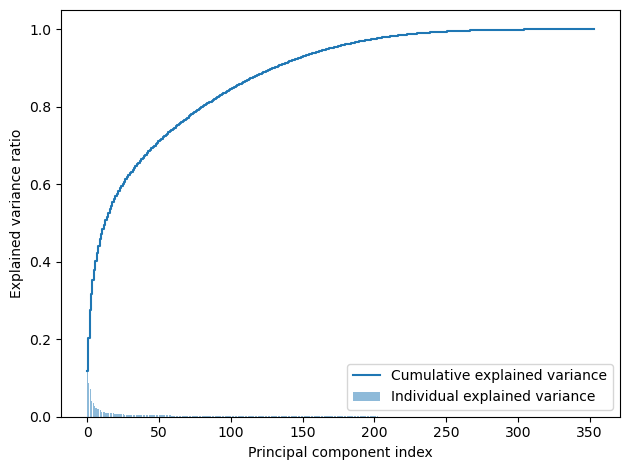

In [20]:
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#cum_sum_eigenvalues

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [21]:
X_train_scaled.shape
# 354 features on X_train_scaled

(144972, 354)

In [22]:
pca.explained_variance_ratio_[:150].sum()

0.9278635566262357

In [23]:
pca.explained_variance_ratio_[:100].sum()

0.8432290100446662

        - Choose the number of dimensions

In [24]:
pca = PCA(125)
pca.fit(X_train_scaled)

PCA(n_components=125)

In [25]:
pca.explained_variance_ratio_.sum()

0.8892665309827135

        - Apply PCA on train and test data

In [26]:
pca = PCA(0.89)
pca.fit(X_train_scaled)

PCA(n_components=0.89)

In [27]:
#pca.explained_variance_ratio_

In [28]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5, #max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.2, # fraction of X-train to use in each tree
                             random_state = 42)
clf.fit(X_train_pca, y_train)
print(clf.score(X_train_pca, y_train))
print(clf.score(X_test_pca, y_test))

y_pred = clf.predict(X_test_pca)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.6623968766382474
0.6465964470995127


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[11870,  6213],
       [  531,   469]])

- Variance Thresholds Method (works best on scaled data)

In [30]:
# 'Numerical' dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numerical)

In [31]:
pd.DataFrame(numerical_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314
0,0.000000,0.608247,0.666667,1.000000,0.000000,0.000000,0.393939,0.343434,0.181818,0.101010,0.020202,0.011494,0.555556,0.010051,0.011108,0.009378,0.0,0.353535,0.656566,0.474747,0.535354,0.929293,0.010101,0.0,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.113402,0.0,0.000000,0.000000,0.464286,0.571429,0.607143,0.476190,0.595238,0.642857,0.333333,0.313131,0.424242,0.272727,0.111111,0.141414,0.181818,0.171717,0.131313,0.111111,0.151515,0.121212,0.111111,0.343434,0.252525,0.181818,0.262626,0.101010,0.232323,0.181818,0.333333,0.494949,0.282828,0.121212,0.040404,0.616162,0.070707,0.164384,0.191919,0.304615,0.394286,0.979798,0.959596,0.020202,0.020202,0.000000,0.000000,0.070707,0.070707,0.000000,0.079833,0.105833,0.230769,0.153846,0.868687,0.141414,0.969697,0.040404,0.070707,0.383838,0.808081,0.707071,0.323232,0.848485,0.161616,0.060606,0.04,0.050505,0.090909,0.151515,0.030303,0.226667,0.505051,0.252525,0.000000,0.000000,0.000000,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.010101,0.616162,0.682353,0.677778,0.245902,0.100,0.020202,0.000000,0.000000,0.141414,0.010101,0.000000,0.000000,0.020202,0.050505,0.171717,0.737374,0.000000,0.271889,0.774120,0.204667,0.212000,0.232667,0.252000,0.073818,0.131313,0.232323,0.232323,0.232323,0.151515,0.010101,0.00,0.000000,0.010101,0.040404,0.252525,0.242424,0.262626,0.171717,0.020202,0.00,0.00000,0.020202,0.282828,0.040404,0.515152,0.010101,0.464646,0.545455,0.030303,0.888889,0.080808,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.040404,0.010101,0.131313,0.155556,0.210526,0.020202,0.454545,0.565657,0.646465,0.505051,0.646465,0.444444,0.626263,0.535354,1.000000,0.0,0.000000,0.090909,0.030303,0.080808,0.131313,0.090909,0.000000,0.054545,0.090909,0.030303,0.151515,0.191919,0.050505,0.040404,0.030303,0.0,0.030303,0.414141,0.010101,0.000000,0.070707,0.131313,0.060606,0.050505,0.000000,0.059701,0.090909,0.040404,0.010101,0.030303,0.101010,0.020202,0.010101,0.070707,0.787879,0.020202,0.000000,0.705882,0.161616,0.101010,0.393939,0.212121,0.216216,0.040404,0.030303,0.051546,0.202020,0.100000,0.263889,0.040404,0.000000,0.000000,0.000000,0.181818,0.393939,0.000000,0.343434,0.232323,0.181818,0.161616,0.012048,0.040404,0.000000,0.250000,0.000000,0.000000,0.050505,0.018182,0.000000,0.000000,0.000000,0.000000,0.00,0.074074,0.0,0.030303,0.747475,0.888889,0.080808,0.000000,0.040404,0.969697,0.777778,0.191919,0.419355,0.596154,0.050505,0.141414,0.141414,0.313131,0.545455,0.464646,0.0,0.0,0.909091,0.000000,0.101010,0.000000,0.0,0.000000,0.333333,0.656566,0.404040,1.000000,1.000000,0.285714,0.4,0.101010,0.070707,0.433333,0.366492,0.315789,0.168831,0.023965,0.127119,0.341463,0.005,0.001401,0.010,0.003676,0.006465,0.498045,0.0,1.000000,0.622951
1,0.000014,0.463918,0.833333,1.000000,0.066390,0.000000,0.151515,0.555556,0.111111,0.060606,0.020202,0.011494,1.000000

In [32]:
from sklearn.feature_selection import VarianceThreshold 

# identify columns with same level of values

# How much variance you want in a particular column?
## 0.02 small value that is non 0 (for scaled data between 0-1)
var_threshold = 0.02
# Create a selector and we put threshold as a parameter (tupple of variables)
## if not scaled, possible to provide a value for each column... more work.
sel = VarianceThreshold(threshold=(var_threshold))

# 1) default is threshold = 0 :eliminate all columns that are identical for all rows
# 2) in practice we would scale the columns first, and then apply threshold, or apply 
#    a different threshold for different columns

# This drops the columns that have a variance less than this threshold
sel = sel.fit(numerical_scaled) # train
temp = sel.transform(numerical_scaled) # transform
temp = pd.DataFrame(temp)
print(numerical_scaled.shape)
print(temp.shape)

(95412, 315)
(95412, 79)


    - This selector would pass from 315 columns to 79
    
    - If 0.01 --> 127 columns (eliminate fewer / allow smaller variance)
    - If 0.1 --> 16 columns (loss of lots of columns with low variance, but also a lot of information!)

In [33]:
# To check which columns were removed, you can manipulate the results from the code below. This gives the variance of each feature in order
# of appearance of the dataset.

# List of computed variance for each column:
# sel.variances_


# Result as True and False for the columns that we selected and those which were removed, respectively.
sel.variances_ > var_threshold
sel.get_support() # this method does the same as previous code line
var_list = list(sel.get_support()) # We add in a list --> can zip with column names (next cell)
#var_list

# True: enough variation
# False: not enough variation --> selector: needs to go

In [34]:
# List of column names where FALSE
col_to_drop = [col[0] for col in zip(numerical.columns, var_list) if col[1] == False]
len(col_to_drop)

236

In [35]:
# Getting all info of the columns to be dropped
removed_columns = pd.DataFrame(data=(numerical.columns,sel.variances_,sel.get_support()), index=('column_name','variance','statement')).T
removed_columns.loc[(removed_columns['statement'] == False),:]

,column_name,variance,statement
0,TCODE,0.000175,False
4,HIT,0.001491,False
5,MALEMILI,0.002618,False
6,MALEVET,0.013424,False
9,LOCALGOV,0.001968,False
...,...,...,...
306,MINRAMNT,0.000077,False
307,MAXRAMNT,0.000025,False
308,LASTGIFT,0.000195,False
309,TIMELAG,0.000051,False


In [36]:
# drop columns from the numerical dataset
numerical_vrm = numerical.drop(col_to_drop, axis=1)
numerical_vrm.shape

(95412, 79)

In [37]:
data2 = pd.concat([numerical_vrm, categorical, targets], axis = 1)
data2['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [38]:
# X-y split
y = data2['TARGET_B']
X = data2.drop(['TARGET_B'], axis = 1)

# Split features
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

# Encoding categoricals so we can use the same dataset to perform a regression later (in the lab).
# it is not needed for a DecisionTree or RandomForest model
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)

# Note: we need to do train/test split before downsampling, and then only downsample the training set - Why?
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [39]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_train_regression = X_train['TARGET_D']
y_test_regression = X_test['TARGET_D']

# Now we can remove the column target D from the set of features (to much correlated)
X_train_vrm = X_train.drop(['TARGET_D'], axis = 1)
X_test_vrm = X_test.drop(['TARGET_D'], axis = 1)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5, #max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.2, # fraction of X-train to use in each tree
                             random_state = 42)
clf.fit(X_train_vrm, y_train)
print(clf.score(X_train_vrm, y_train))
print(clf.score(X_test_vrm, y_test))

y_pred = clf.predict(X_test_vrm)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.9496521636599458
0.9475973379447676


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[18083,     0],
       [ 1000,     0]])

- Recursive Feature Elimination RFE

In [41]:
X = numerical_scaled # Done before in VRM
y = targets['TARGET_D']

from sklearn.feature_selection import RFE
from sklearn import linear_model
lm = linear_model.LinearRegression() # empty
rfe = RFE(lm, n_features_to_select=25, verbose=False)
rfe.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=25, verbose=False)

In [42]:
# Rank of each column (in order in our df) / 25
#rfe.ranking_

In [50]:
# After the algorithm, it labels the top features as 1 and the rest are marked in an increasing order of importance.
df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = pd.DataFrame(numerical).columns
df_1=df[df['Rank']==1]
display(df_1, len(df_1))

,Rank,Column_name
16,1,POP90C1
17,1,POP90C2
18,1,POP90C3
25,1,ETH5
33,1,ETH13
34,1,ETH14
35,1,ETH15
36,1,ETH16
76,1,DW3
78,1,DW5


25

In [51]:
col_to_drop = []

for col in df_1['Column_name'].values:
    col_to_drop.append(col)
    
len(col_to_drop)

25

In [52]:
# drop columns from the numerical dataset
numerical_rfe = numerical.drop(col_to_drop, axis=1)
numerical_rfe.shape

(95412, 290)

In [53]:
data3 = pd.concat([numerical_rfe, categorical, targets], axis = 1)
data3['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [54]:
# X-y split
y = data3['TARGET_B']
X = data3.drop(['TARGET_B'], axis = 1)

# Split features
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

# Encoding categoricals so we can use the same dataset to perform a regression later (in the lab).
# it is not needed for a DecisionTree or RandomForest model
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)

# Note: we need to do train/test split before downsampling, and then only downsample the training set - Why?
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [55]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_train_regression = X_train['TARGET_D']
y_test_regression = X_test['TARGET_D']

# Now we can remove the column target D from the set of features (to much correlated)
X_train_rfe = X_train.drop(['TARGET_D'], axis = 1)
X_test_rfe = X_test.drop(['TARGET_D'], axis = 1)

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5, #max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.2, # fraction of X-train to use in each tree
                             random_state = 42)
clf.fit(X_train_rfe, y_train)
print(clf.score(X_train_rfe, y_train))
print(clf.score(X_test_rfe, y_test))

y_pred = clf.predict(X_test_rfe)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.9496521636599458
0.9475973379447676


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[18083,     0],
       [ 1000,     0]])

#### Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the business?

Let's take the example of a credit card fraud detection system. In this scenario, false positives occur when the system flags a legitimate transaction as fraudulent, while false negatives occur when the system fails to flag a fraudulent transaction.


- The cost of a false positive in this scenario could include:


    - Inconvenience to the cardholder if their legitimate transaction is declined or blocked
    - Potential loss of revenue for the merchant if the transaction is cancelled or not completed
    - Cost of investigating the flagged transaction, which could be significant if it involves contacting the cardholder and merchant to verify the transaction.

- The cost of a false negative in this scenario could include:


    - Financial loss to the cardholder if their card is used fraudulently and they are held liable for the charges
    - Reputation damage for the credit card company if their customers' accounts are compromised
    - Potential loss of revenue if cardholders switch to a competitor with a more reliable fraud detection system.

By assessing the costs associated with false positives and false negatives, the credit card company can tune their fraud detection system to optimize the trade-off between these errors, ensuring that the system is effective in detecting fraud while minimizing inconvenience to cardholders and merchants.